# <u> An analyse of the top 5% Fifa players preformances over 2017 to 2021 and its affect on Potential Ranking and Wage </u>



# Aims and Objectives

This report will analyse the top 5% Fifa players preformance over 2017 to 2021 and it affect on Potential ranking and Wage. Fifa stands for the Federation Internationale de Football Association, which is the governing body of world soccer.

My test data consists of all the Fifa matches and player stats from 2017 until 2021. I will use the players stats to analyse my data.

I predict the top 5% players of FIFA 21 are faster (higher Acceleration and Agility) compared to FIFA 17. 

- Does preferred Foot affect, Potential ranking and Wage
- Does nationality affect, Potential ranking and Wage
- Does age affect, Potential ranking and Wage ?
- Does Acceleration affect, Potential ranking and Wage ?
- Does Agility affect, Potential ranking and Wage ?
- Does BMI affect, Potential ranking and Wage ?

The data was scraped from sofifa (https://sofifa.com) is in a public domain. The data has all the fifa players stats from over the years. The the source from which I download the date is also public domain https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset, therefore, I do not need to take into consideration ethics dilemma.


This topic has clear use cases in the realm of sports betting. 


# Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import os
import time

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
#Let's load the dataset and create their dataframes
players17_df = pd.read_csv('players_17.csv')
players18_df = pd.read_csv('players_18.csv')
players19_df = pd.read_csv('players_19.csv')
players20_df = pd.read_csv('players_20.csv')
players21_df = pd.read_csv('players_21.csv')

### Data Dictionary

#### Match Stats include:

##### Season - The year the match was played
##### Name- The players
##### Nationality- Nationality
##### Wage- The wage the player earns in euros
##### Prederred_Foot- The preffered foot of the player
##### Shooting- The shooting stat of the player
##### Passing- The passing stat of the player
##### Dribbling- The dribbling stat of the player
##### Defending- The defending stat of the player
##### Acceleration- The acceleration stat of the player
##### Agility- The agility stat of the player
##### BMI- The BMI stat of the player



In [3]:
players17_df.head (10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,65+4,61+4,61+4,61+4,65+4,61+4,53+4,53+4,53+4,61+4
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,62+4,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,63+4,58+4,58+4,58+4,63+4,58+4,46+4,46+4,46+4,58+4
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,36+4,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,68+4,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4
5,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,25,1990-11-07,193,82,Spain,Manchester United,...,31+3,34+3,34+3,34+3,31+3,31+3,32+3,32+3,32+3,31+3
6,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,34,1981-10-03,195,95,Sweden,Manchester United,...,59+4,60+4,60+4,60+4,59+4,55+4,53+4,53+4,53+4,55+4
7,173731,https://sofifa.com/player/173731/gareth-bale/1...,G. Bale,Gareth Frank Bale,26,1989-07-16,183,74,Wales,Real Madrid,...,75+3,71+3,71+3,71+3,75+3,72+3,67+3,67+3,67+3,72+3
8,183907,https://sofifa.com/player/183907/jerome-boaten...,J. Boateng,Jérôme Boateng,27,1988-09-03,192,90,Germany,FC Bayern München,...,81+3,83+3,83+3,83+3,81+3,83+3,87+3,87+3,87+3,83+3
9,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,27,1988-08-21,185,79,Poland,FC Bayern München,...,61+3,62+3,62+3,62+3,61+3,58+3,56+3,56+3,56+3,58+3


In [4]:
players18_df.head (10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+4,62+4,62+4,62+4,66+4,61+4,53+4,53+4,53+4,61+4
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+4,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+4,59+4,59+4,59+4,64+4,59+4,46+4,46+4,46+4,59+4
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,36+4,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,68+4,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4
5,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,28,1988-08-21,185,79,Poland,FC Bayern München,...,61+3,62+3,62+3,62+3,61+3,58+3,57+3,57+3,57+3,58+3
6,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,26,1990-11-07,193,76,Spain,Manchester United,...,36+2,41+2,41+2,41+2,36+2,35+2,34+2,34+2,34+2,35+2
7,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,26,1991-01-07,173,76,Belgium,Chelsea,...,64+3,61+3,61+3,61+3,64+3,59+3,47+3,47+3,47+3,59+3
8,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,31,1986-03-30,183,75,Spain,Real Madrid,...,81+3,83+3,83+3,83+3,81+3,84+3,87+3,87+3,87+3,84+3
9,167664,https://sofifa.com/player/167664/gonzalo-higua...,G. Higuaín,Gonzalo Gerardo Higuaín,29,1987-12-10,184,87,Argentina,Juventus,...,55+3,52+3,52+3,52+3,55+3,51+3,46+3,46+3,46+3,51+3


In [5]:
players19_df.head (10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+4,61+4,61+4,61+4,65+4,61+4,54+4,54+4,54+4,61+4
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+7,61+7,61+7,61+7,63+7,59+7,48+7,48+7,48+7,59+7
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+7,61+7,61+7,61+7,66+7,61+7,47+7,47+7,47+7,61+7
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,36+2,41+2,41+2,41+2,36+2,35+2,34+2,34+2,34+2,35+2
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3
5,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,32,1986-03-30,184,82,Spain,Real Madrid,...,82+3,84+3,84+3,84+3,82+3,84+3,88+3,88+3,88+3,84+3
6,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,31,1987-01-24,182,86,Uruguay,FC Barcelona,...,70+4,68+4,68+4,68+4,70+4,66+4,63+4,63+4,63+4,66+4
7,177003,https://sofifa.com/player/177003/luka-modric/1...,L. Modrić,Luka Modrić,32,1985-09-09,172,66,Croatia,Real Madrid,...,83+3,82+3,82+3,82+3,83+3,80+3,71+3,71+3,71+3,80+3
8,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,27,1991-01-07,173,74,Belgium,Chelsea,...,66+6,63+6,63+6,63+6,66+6,61+6,50+6,50+6,50+6,61+6
9,200389,https://sofifa.com/player/200389/jan-oblak/190002,J. Oblak,Jan Oblak,25,1993-01-07,188,87,Slovenia,Atlético Madrid,...,30+2,32+2,32+2,32+2,30+2,30+2,32+2,32+2,32+2,30+2


In [6]:
players20_df.head (10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+6,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,84+3,84+3,84+3,79+3,81+3,88+3,88+3,88+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,82+3,82+3,82+3,82+3,82+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,71+6,67+6,67+6,67+6,71+6,67+6,58+6,58+6,58+6,67+6


In [7]:
players21_df.head (10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


#### NUMBER OF ROWS AND COLUMNS ARE :

In [8]:
players17_df.shape 

(17597, 106)

In [9]:
players18_df.shape 

(17954, 106)

In [10]:
players19_df.shape 

(18085, 106)

In [11]:
players20_df.shape 

(18483, 106)

In [12]:
players21_df.shape

(18944, 106)

As we can see, the dataset contains information about more than 18000 players.

.info method provides us a way to describe data, it shows us name of the column, number of non-null values and type of the data.

In [13]:
players20_df.info
players21_df.info

<bound method DataFrame.info of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         200389  https://sofifa.com/player/200389/jan-oblak/210002   
3         188545  https://sofifa.com/player/188545/robert-lewand...   
4         190871  https://sofifa.com/player/190871/neymar-da-sil...   
...          ...                                                ...   
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...   
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés 

# Data Manipulation and Cleaning

#### Adding a new column

In [14]:
players17_df.astype(str)
players18_df.astype(str) 
players19_df.astype(str)
players20_df.astype(str)
players21_df.astype(str)

players17_df["season"]=2017
players18_df["season"]=2018
players19_df["season"]=2019
players20_df["season"]=2020
players21_df["season"]=2021

### Filtering top 5% of players from 2017-2021

The fifa top list consits of 100 players. We are only analysing the top 5% from 2017-2021. Therefore, we are analysing the top 5 players over the years.

In [15]:
players17_df.shape

(17597, 107)

In [16]:
players17_df= players17_df.drop(labels=range(5,17597), axis=0)
players17_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,61+4,61+4,61+4,65+4,61+4,53+4,53+4,53+4,61+4,2017
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,2017
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,58+4,58+4,58+4,63+4,58+4,46+4,46+4,46+4,58+4,2017
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4,2017
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4,2017


In [17]:
players17_df.shape

(5, 107)

In [18]:
players18_df.shape

(17954, 107)

In [19]:
players18_df= players18_df.drop(labels=range(5,17954), axis=0)
players18_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,62+4,62+4,62+4,66+4,61+4,53+4,53+4,53+4,61+4,2018
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,2018
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,59+4,59+4,59+4,64+4,59+4,46+4,46+4,46+4,59+4,2018
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4,2018
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4,2018


In [20]:
players19_df.shape

(18085, 107)

In [21]:
players19_df= players19_df.drop(labels=range(5,18085), axis=0)
players19_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,61+4,61+4,61+4,65+4,61+4,54+4,54+4,54+4,61+4,2019
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,61+7,61+7,61+7,63+7,59+7,48+7,48+7,48+7,59+7,2019
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+7,61+7,61+7,66+7,61+7,47+7,47+7,47+7,61+7,2019
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,41+2,41+2,41+2,36+2,35+2,34+2,34+2,34+2,35+2,2019
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3,2019


In [22]:
players20_df.shape

(18483, 107)

In [23]:
players20_df= players20_df.drop(labels=range(5,18483), axis=0)
players20_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,2020
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3,2020
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6,2020
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,2020
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6,2020


In [24]:
players21_df.shape

(18944, 107)

In [25]:
players21_df= players21_df.drop(labels=range(5,18944), axis=0)
players21_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,2021
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,2021
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,2021
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,2021
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,2021


#### Merging data sets

Merging the datasets to create one data frame to make the data easier to read.

In [26]:
df=players17_df.append(players18_df)
df1=df.append(players19_df)
df2=df1.append(players20_df)
df3=df2.append(players21_df)
df3.head(30)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,season
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,61+4,61+4,61+4,65+4,61+4,53+4,53+4,53+4,61+4,2017
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,2017
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,58+4,58+4,58+4,63+4,58+4,46+4,46+4,46+4,58+4,2017
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4,2017
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4,2017
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,62+4,62+4,62+4,66+4,61+4,53+4,53+4,53+4,61+4,2018
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,2018
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,59+4,59+4,59+4,64+4,59+4,46+4,46+4,46+4,59+4,2018
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,41+4,41+4,41+4,36+4,34+4,33+4,33+4,33+4,34+4,2018
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,65+4,65+4,65+4,68+4,64+4,58+4,58+4,58+4,64+4,2018


There seems to be a fair share of both categorical and numerical data. Most of the columns seem to be of use to us, some do not.

#### Combining weight and height columns 

In [27]:
df3["BMI"] = df3["weight_kg"] + df3["height_cm"]

#### Removing redundant or unnecessary columns


Analyse the dataframe to see which columns are the redundant or unnecessary 

In [28]:
df3.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'season', 'BMI'],
      dtype='object', length=108)

#### Dropping columns

In [29]:
del_col_list = [ 'sofifa_id','weight_kg','height_cm','player_url','overall','international_reputation',
       'skill_moves', 'work_rate', 'real_face','club_name',
       'release_clause_eur', 'player_tags', 'team_position', 'nation_position',
       'pace','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control',
       'power_shot_power', 'power_jumping',
       'defending_standing_tackle','ldm', 'cdm', 'rdm', 'rwb', 
       'lb', 'lcb', 'cb', 'rcb', 'rb','long_name', 'dob',
       'league_name', 'league_rank','value_eur'
, 'player_positions','team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_jersey_number', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb','body_type','movement_sprint_speed','player_traits','weak_foot','physic',
                'movement_balance','power_stamina','power_strength','movement_reactions']
fifa_df = df3.drop(del_col_list, axis=1)
fifa_df.head(10)

,short_name,age,nationality,potential,wage_eur,preferred_foot,shooting,passing,dribbling,defending,movement_acceleration,movement_agility,season,BMI
0,Cristiano Ronaldo,31,Portugal,94,575000,Right,92.0,81.0,91.0,33.0,91,90,2017,265
1,L. Messi,29,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2017,242
2,Neymar,24,Brazil,95,450000,Right,84.0,78.0,95.0,30.0,93,96,2017,242
3,M. Neuer,30,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2017,285
4,L. Suárez,29,Uruguay,92,525000,Right,90.0,79.0,87.0,42.0,88,86,2017,267
0,Cristiano Ronaldo,32,Portugal,94,575000,Right,93.0,82.0,90.0,33.0,89,89,2018,265
1,L. Messi,30,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2018,242
2,Neymar,25,Brazil,94,275000,Right,84.0,79.0,95.0,30.0,94,96,2018,243
3,M. Neuer,31,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2018,285
4,L. Suárez,30,Uruguay,92,500000,Right,90.0,79.0,87.0,42.0,88,86,2018,268


In [30]:
#  dropping the duplicates from the dataset.
print(fifa_df.shape)
df3 = fifa_df.drop_duplicates(keep='first')
print(fifa_df.shape)

(25, 14)
(25, 14)


#### Rename headings

In [31]:
fifa_df=fifa_df.rename(columns={"movement_acceleration":"acceleration"})
fifa_df=fifa_df.rename(columns={"movement_agility":"agility"})
fifa_df=fifa_df.rename(columns={"short_name":"name"})
fifa_df=fifa_df.rename(columns={"wage_eur":"wage"})

In [32]:
fifa_df.head (20)

,name,age,nationality,potential,wage,preferred_foot,shooting,passing,dribbling,defending,acceleration,agility,season,BMI
0,Cristiano Ronaldo,31,Portugal,94,575000,Right,92.0,81.0,91.0,33.0,91,90,2017,265
1,L. Messi,29,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2017,242
2,Neymar,24,Brazil,95,450000,Right,84.0,78.0,95.0,30.0,93,96,2017,242
3,M. Neuer,30,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2017,285
4,L. Suárez,29,Uruguay,92,525000,Right,90.0,79.0,87.0,42.0,88,86,2017,267
0,Cristiano Ronaldo,32,Portugal,94,575000,Right,93.0,82.0,90.0,33.0,89,89,2018,265
1,L. Messi,30,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2018,242
2,Neymar,25,Brazil,94,275000,Right,84.0,79.0,95.0,30.0,94,96,2018,243
3,M. Neuer,31,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2018,285
4,L. Suárez,30,Uruguay,92,500000,Right,90.0,79.0,87.0,42.0,88,86,2018,268


#### Reset index 

In [33]:
fifa_df.reset_index()

,index,name,age,nationality,potential,wage,preferred_foot,shooting,passing,dribbling,defending,acceleration,agility,season,BMI
0,0,Cristiano Ronaldo,31,Portugal,94,575000,Right,92.0,81.0,91.0,33.0,91,90,2017,265
1,1,L. Messi,29,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2017,242
2,2,Neymar,24,Brazil,95,450000,Right,84.0,78.0,95.0,30.0,93,96,2017,242
3,3,M. Neuer,30,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2017,285
4,4,L. Suárez,29,Uruguay,92,525000,Right,90.0,79.0,87.0,42.0,88,86,2017,267
5,0,Cristiano Ronaldo,32,Portugal,94,575000,Right,93.0,82.0,90.0,33.0,89,89,2018,265
6,1,L. Messi,30,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2018,242
7,2,Neymar,25,Brazil,94,275000,Right,84.0,79.0,95.0,30.0,94,96,2018,243
8,3,M. Neuer,31,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2018,285
9,4,L. Suárez,30,Uruguay,92,500000,Right,90.0,79.0,87.0,42.0,88,86,2018,268


In [34]:
cols = []
for pos in range(len(fifa_df.columns)):
    if fifa_df.iloc[:, pos].isnull().any():
        cols.append(fifa_df.dtypes.index[pos])
print(cols)

['shooting', 'passing', 'dribbling', 'defending']


#### Checking and replacing NaN values

In [35]:
fifa_df.isna()

,name,age,nationality,potential,wage,preferred_foot,shooting,passing,dribbling,defending,acceleration,agility,season,BMI
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
fifa_df.head(30)

,name,age,nationality,potential,wage,preferred_foot,shooting,passing,dribbling,defending,acceleration,agility,season,BMI
0,Cristiano Ronaldo,31,Portugal,94,575000,Right,92.0,81.0,91.0,33.0,91,90,2017,265
1,L. Messi,29,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2017,242
2,Neymar,24,Brazil,95,450000,Right,84.0,78.0,95.0,30.0,93,96,2017,242
3,M. Neuer,30,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2017,285
4,L. Suárez,29,Uruguay,92,525000,Right,90.0,79.0,87.0,42.0,88,86,2017,267
0,Cristiano Ronaldo,32,Portugal,94,575000,Right,93.0,82.0,90.0,33.0,89,89,2018,265
1,L. Messi,30,Argentina,93,575000,Left,90.0,86.0,96.0,26.0,92,90,2018,242
2,Neymar,25,Brazil,94,275000,Right,84.0,79.0,95.0,30.0,94,96,2018,243
3,M. Neuer,31,Germany,92,225000,Right,NaN,NaN,NaN,NaN,58,52,2018,285
4,L. Suárez,30,Uruguay,92,500000,Right,90.0,79.0,87.0,42.0,88,86,2018,268


# Data Analysis and Visulaisation

## Preferred Foot, Potential Ranking and Wage

In [37]:
counts_preferred_foot = fifa_df["preferred_foot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["preferred_foot","Count"]
print(counts_preferred_foot)

  preferred_foot  Count
0          Right     20
1           Left      5


From analysis above, it has been found that 8 playes use Right leg preferably and 2 players use preferably Left leg. It can be observed from bar chart below.

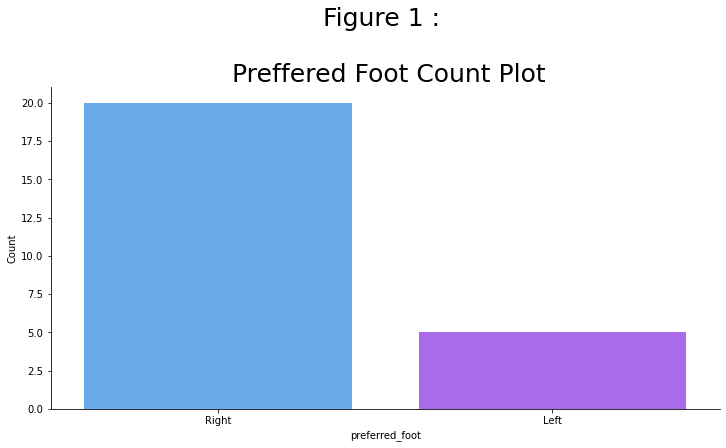

In [38]:
pt = sns.catplot(y="Count",
            x="preferred_foot", data=counts_preferred_foot,
           palette="cool",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=25);

#### Does preffered foot have some effect on potential ranking ?

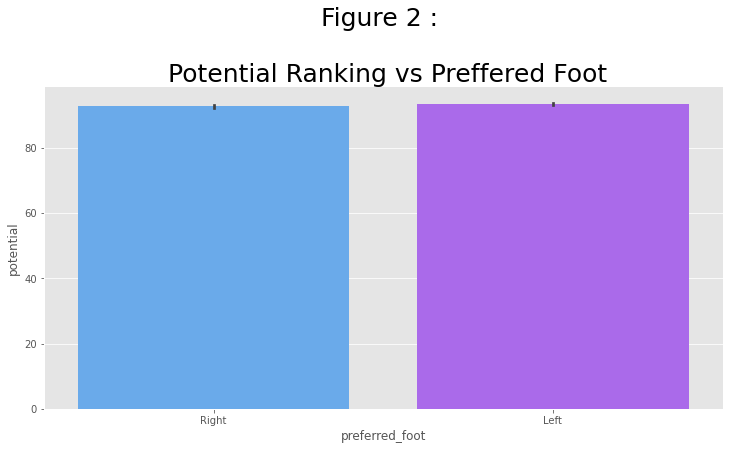

In [39]:
sns.catplot(x="preferred_foot", y="potential", data=fifa_df,
            aspect=2, kind="bar", palette="cool");
plt.style.use("ggplot")
plt.title("Figure 2 : \n\n Potential Ranking vs Preffered Foot",
          fontsize=25);

<i>From the figure, it is not very clearwhich preffered foot has more ratings. Therefore, it requires some more statistical test analysis. </i>

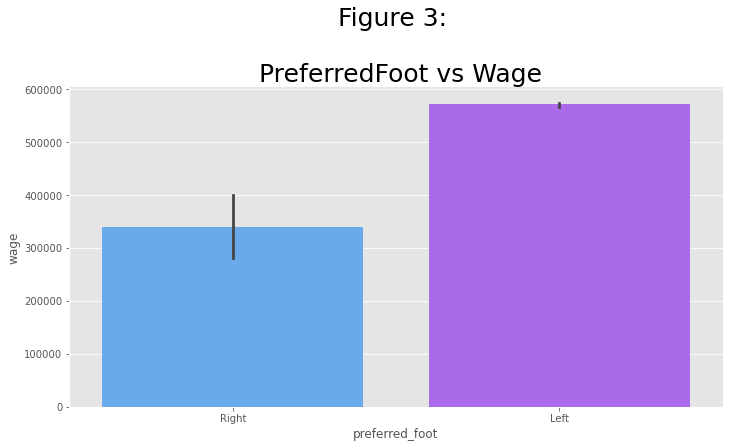

In [40]:
sns.catplot(x="preferred_foot", y="wage", data=fifa_df, aspect=2, kind="bar",palette="cool");
plt.style.use("ggplot")
plt.title("Figure 3: \n\n PreferredFoot vs Wage",
          fontsize=25);

## Does Nationality affect Potential Ranking and Wage?

In [41]:
counts_Nationality = fifa_df["nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,Argentina,5
1,Portugal,5
2,Brazil,5
3,Germany,2
4,Slovenia,2


In [42]:
counts_Nationality_top5 = counts_Nationality.iloc[0:5,:]
print(counts_Nationality_top5)

     Nations  Counts
0  Argentina       5
1   Portugal       5
2     Brazil       5
3    Germany       2
4   Slovenia       2


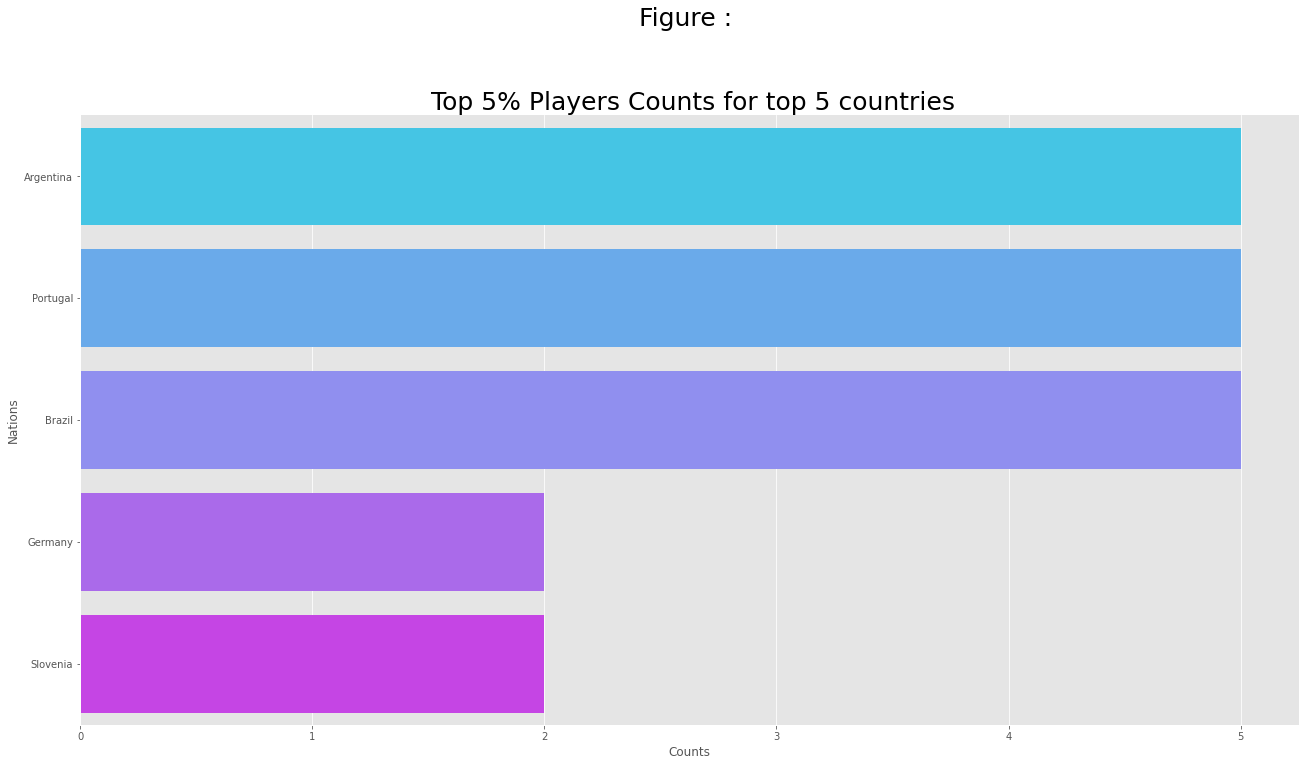

In [43]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top5,
            palette="cool",height=9,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 5% Players Counts for top 5 countries",
          fontsize=25);

The bar chart shows that Brazil, Argentina and Portugal have the most count for the top 5% football players from 2017-2021.

In [44]:
avgwageoverall = fifa_df.groupby("nationality", as_index=False)["wage","potential"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()

,nationality,wage,potential
0,Argentina,572000.0,93.4
8,Uruguay,512500.0,92.0
5,Portugal,434000.0,93.4
1,Belgium,412500.0,91.5
2,Brazil,319000.0,93.0


In [45]:
top5bywage = avgwageoverall.iloc[0:5,:]
top5bywage

,nationality,wage,potential
0,Argentina,572000.0,93.4
8,Uruguay,512500.0,92.0
5,Portugal,434000.0,93.4
1,Belgium,412500.0,91.5
2,Brazil,319000.0,93.0


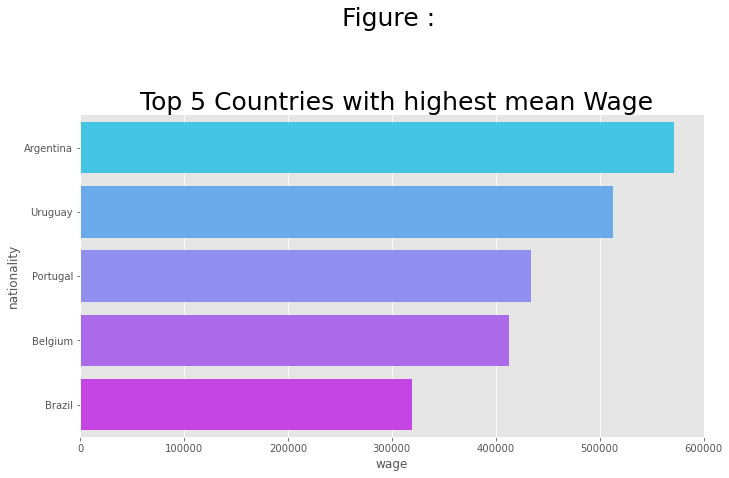

In [46]:
sns.catplot(y="nationality",
            x="wage",data=top5bywage,
            palette="cool",height=5,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 5 Countries with highest mean Wage",
          fontsize=25);

The bar chart shows that Argentina, Uruguay and Portugal have the highest mean wage for the top 5 football players from 2017-2021.

#### Does nationality have some effect on potential ranking ?


In [47]:
avgwageoverall.sort_values(by="potential",inplace=True,ascending=False)
top5byoverall = avgwageoverall.iloc[0:5,:]
top5byoverall

,nationality,wage,potential
0,Argentina,572000.0,93.4
5,Portugal,434000.0,93.4
2,Brazil,319000.0,93.0
7,Spain,250000.0,93.0
6,Slovenia,122500.0,93.0


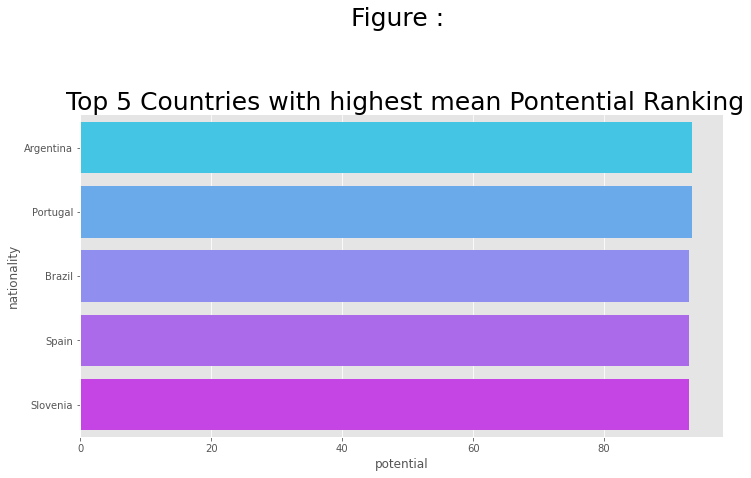

In [48]:
sns.catplot(y="nationality",
            x="potential",data=top5byoverall,
           height=5,kind="bar",aspect=2,palette="cool")
plt.title("Figure : \n\n\n Top 5 Countries with highest mean Pontential Ranking",
          fontsize=25);

### Findings Nationality and Potential Ranking and Wage

- The bar chart shows that Brazil, Argentina and Portugal have the most count for the top 5% football players from 2017-2021.
- Nationality does affect wage and potential ranking of Player.
- The bar chart shows that Argentina, Uruguay and Portugal have the highest mean wage for the top 5 football players from 2017-2021.


## Does Age affect, Potential Ranking and Wage ?

In [49]:
fifa_df.age.value_counts()

27    4
31    4
30    3
32    2
33    2
26    2
28    2
29    2
34    1
35    1
24    1
25    1
Name: age, dtype: int64

In [50]:
fifa_df.age.isnull().any()

False

In [51]:
age= fifa_df.groupby("age", as_index=False)["wage","potential"].mean()
age.sort_values(by="wage",inplace=True,ascending=False)
age.head()

,age,wage,potential
8,32,575000.000000,94.000000
5,29,550000.000000,92.500000
9,33,480000.000000,93.500000
0,24,450000.000000,95.000000
6,30,433333.333333,92.333333


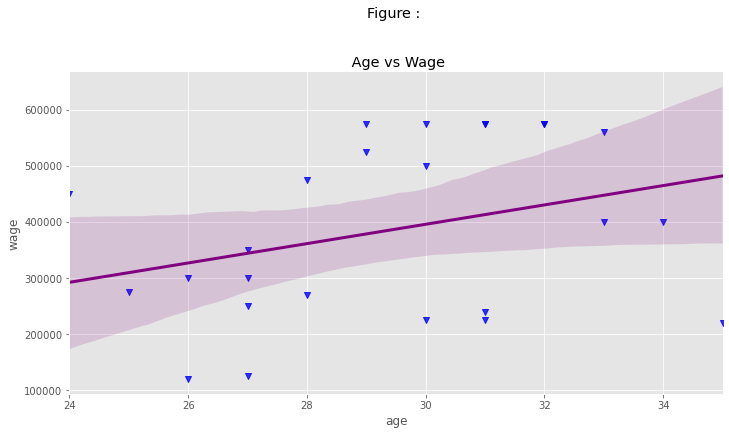

In [52]:
sns.lmplot(x="age", y="wage",data=fifa_df,markers="v",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"purple"},aspect=2);
plt.title("Figure : \n\n\n Age vs Wage");

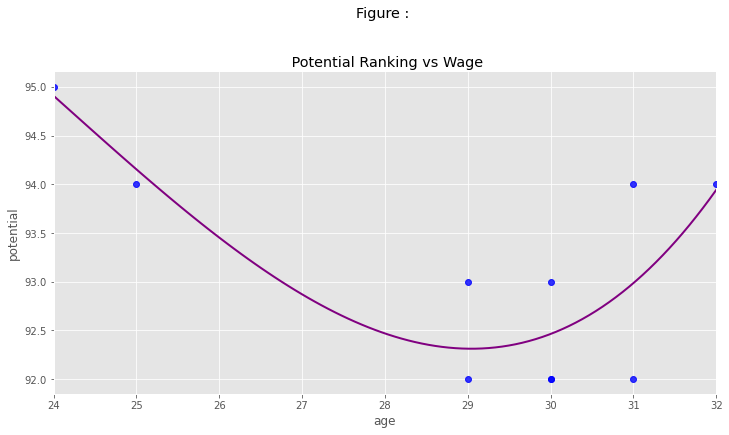

In [53]:
sns.lmplot(x="age", y="potential",data=df,markers="o",
           order=3, ci=None, scatter_kws={"color": "blue"},
         line_kws={"linewidth":2,"color":"purple"},aspect=2);

plt.title("Figure : \n\n\n Potential Ranking vs Wage");


#### Findings Age and Potential Ranking and Wage:

- Age lies between 24 to 32.
- Age of a player does not affect much on their wage nor potential.
- Between the ages of 26 to 31 players tend to have a high potential however their is an decrease between the ages of 28 to 29.

## Does Acceleration affect, Potenntial Ranking and Wage ?

In [54]:
fifa_df.acceleration.head()

0    91
1    92
2    93
3    58
4    88
Name: acceleration, dtype: int64

In [55]:
fifa_df.acceleration.value_counts()

94    5
91    4
89    3
43    2
88    2
58    2
92    2
57    1
77    1
78    1
87    1
93    1
Name: acceleration, dtype: int64

In [56]:
fifa_df.acceleration.head()

0    91
1    92
2    93
3    58
4    88
Name: acceleration, dtype: int64

In [57]:
fifa_df.acceleration.unique()

array([91, 92, 93, 58, 88, 89, 94, 57, 78, 43, 87, 77])

In [58]:
fifa_df.acceleration.isnull().any()

False

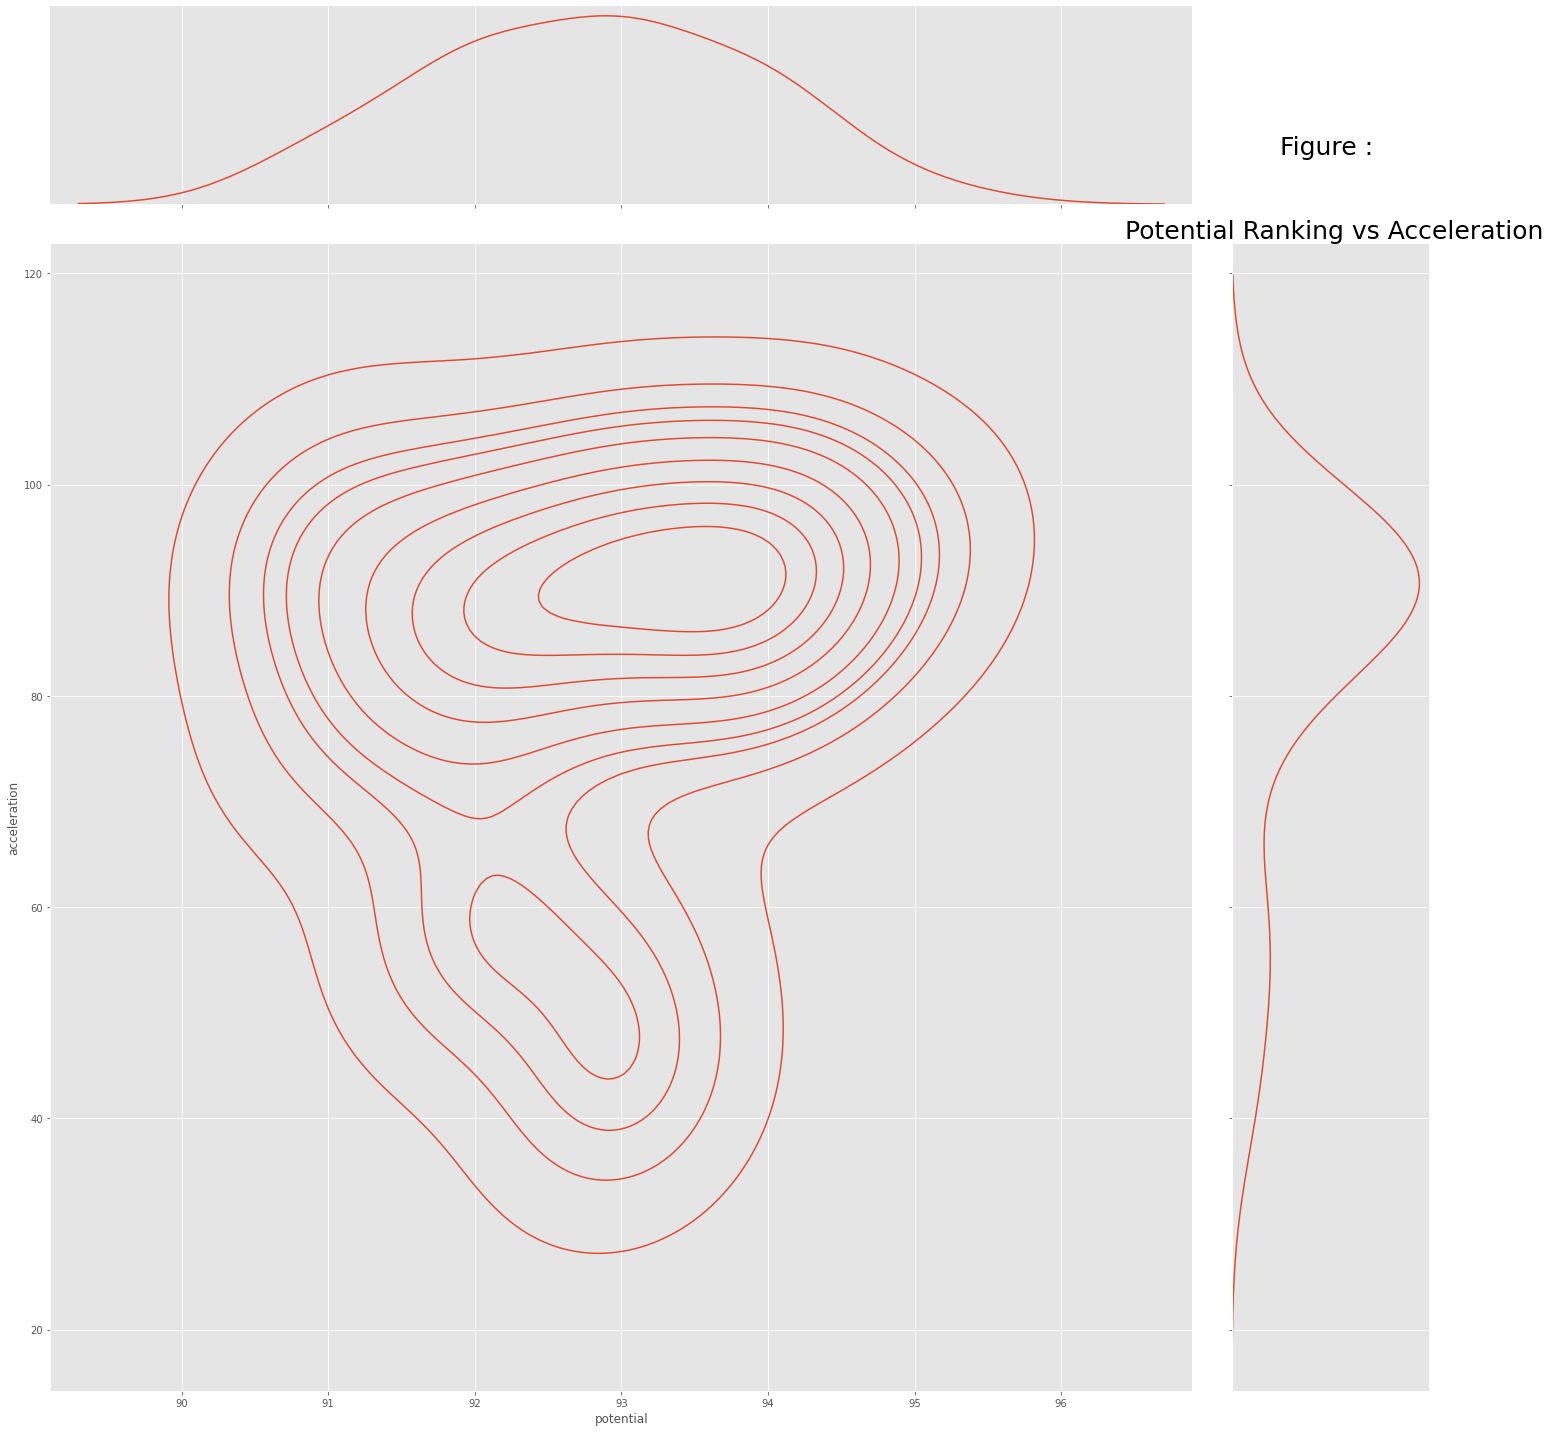

In [59]:
sns.jointplot(x="potential", y="acceleration",data=fifa_df,
            
            kind="kde",height=20,palette="cool");
plt.title("Figure : \n\n\n Potential Ranking vs Acceleration", fontsize=25);

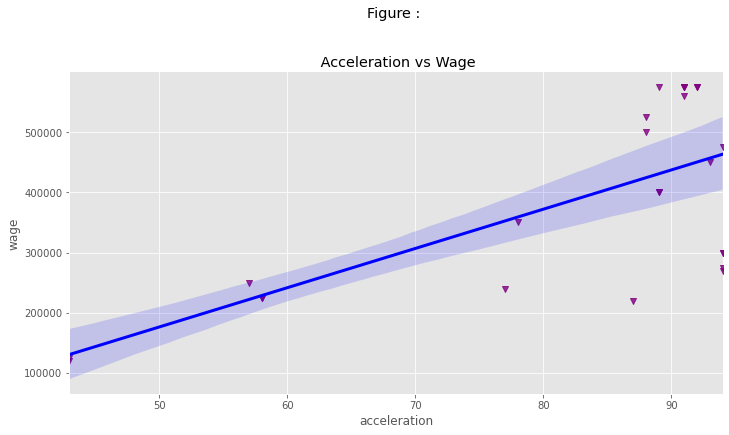

In [60]:
sns.lmplot(x="acceleration", y="wage",data=fifa_df,markers="v",
            scatter_kws={"color": "purple"},
         line_kws={"linewidth":3,"color":"blue"},aspect=2);
plt.title("Figure : \n\n\n Acceleration vs Wage");

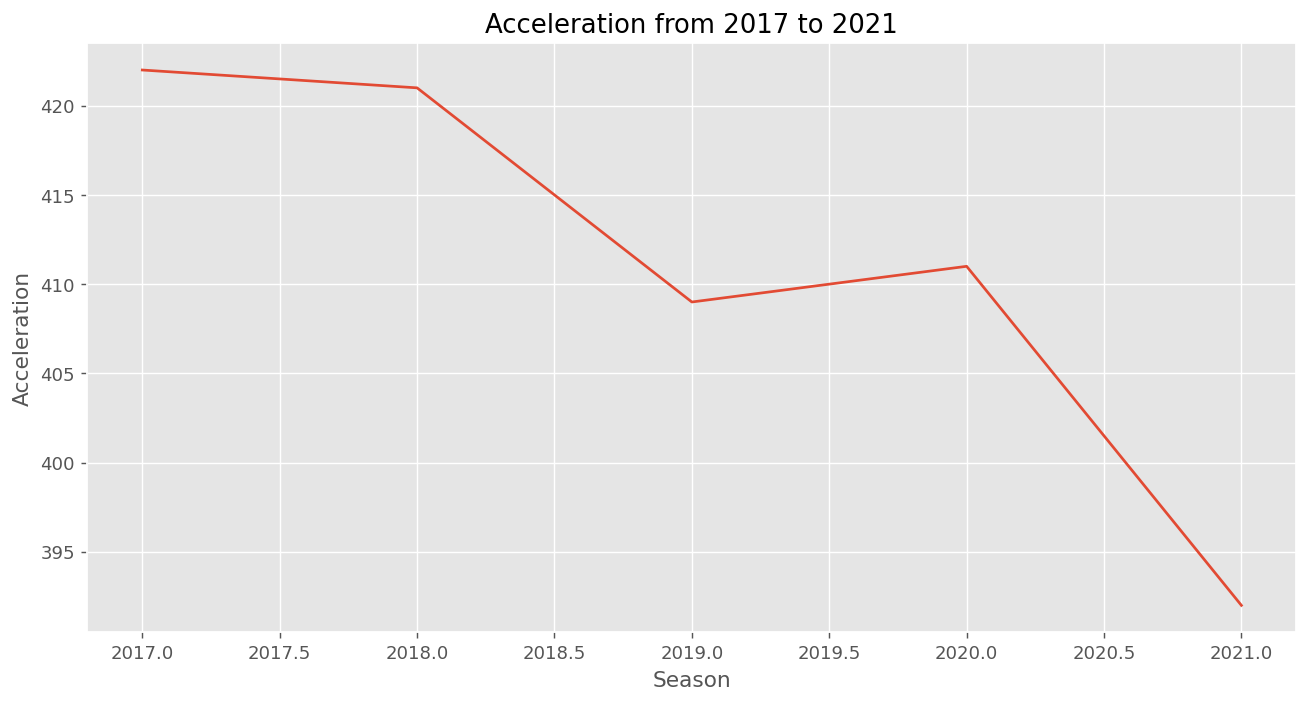

In [61]:
acceleration_season = fifa_df.groupby('season')['acceleration'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Season', fontsize = 12)
#on y-axis
plt.ylabel('Acceleration', fontsize = 12)
#title of the line plot
plt.title('Acceleration from 2017 to 2021')

#plotting the graph
plt.plot(acceleration_season)

#displaying the line plot
plt.show()

### Findings Acceleration and Pontential Ranking and Wage:

- Acceleration lies between 40 to 95.
- Acceleration of a Player does affect a players wage. The higher the acceleration the high the wage.
- As Acceleration increase the potential ranking increases.
- There is a decrease in acceleration of the players over the season.

## Does Agility affect, Pontential Ranking and Wage ?

In [62]:
fifa_df.agility.head()

0    90
1    90
2    96
3    52
4    86
Name: agility, dtype: int64

In [63]:
fifa_df.agility.value_counts()

96    5
87    3
90    3
67    2
52    2
86    2
91    2
77    1
79    1
89    1
60    1
93    1
95    1
Name: agility, dtype: int64

In [64]:
fifa_df.agility.isnull().any()

False

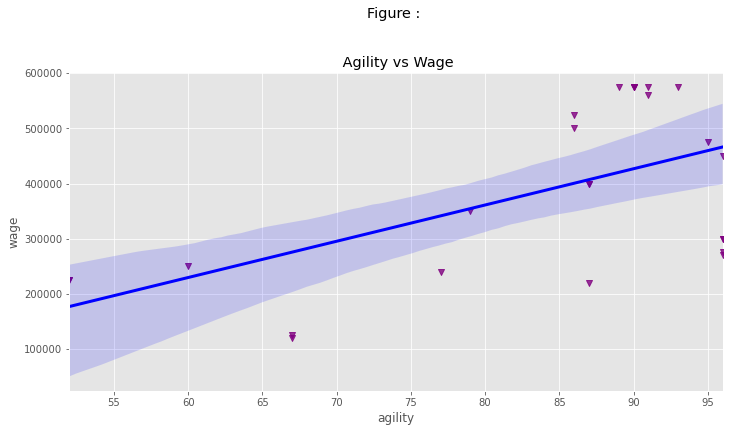

In [65]:
sns.lmplot(x="agility", y="wage",data=fifa_df,markers="v",
            scatter_kws={"color": "purple"},
         line_kws={"linewidth":3,"color":"blue"},aspect=2);
plt.title("Figure : \n\n\n Agility vs Wage");

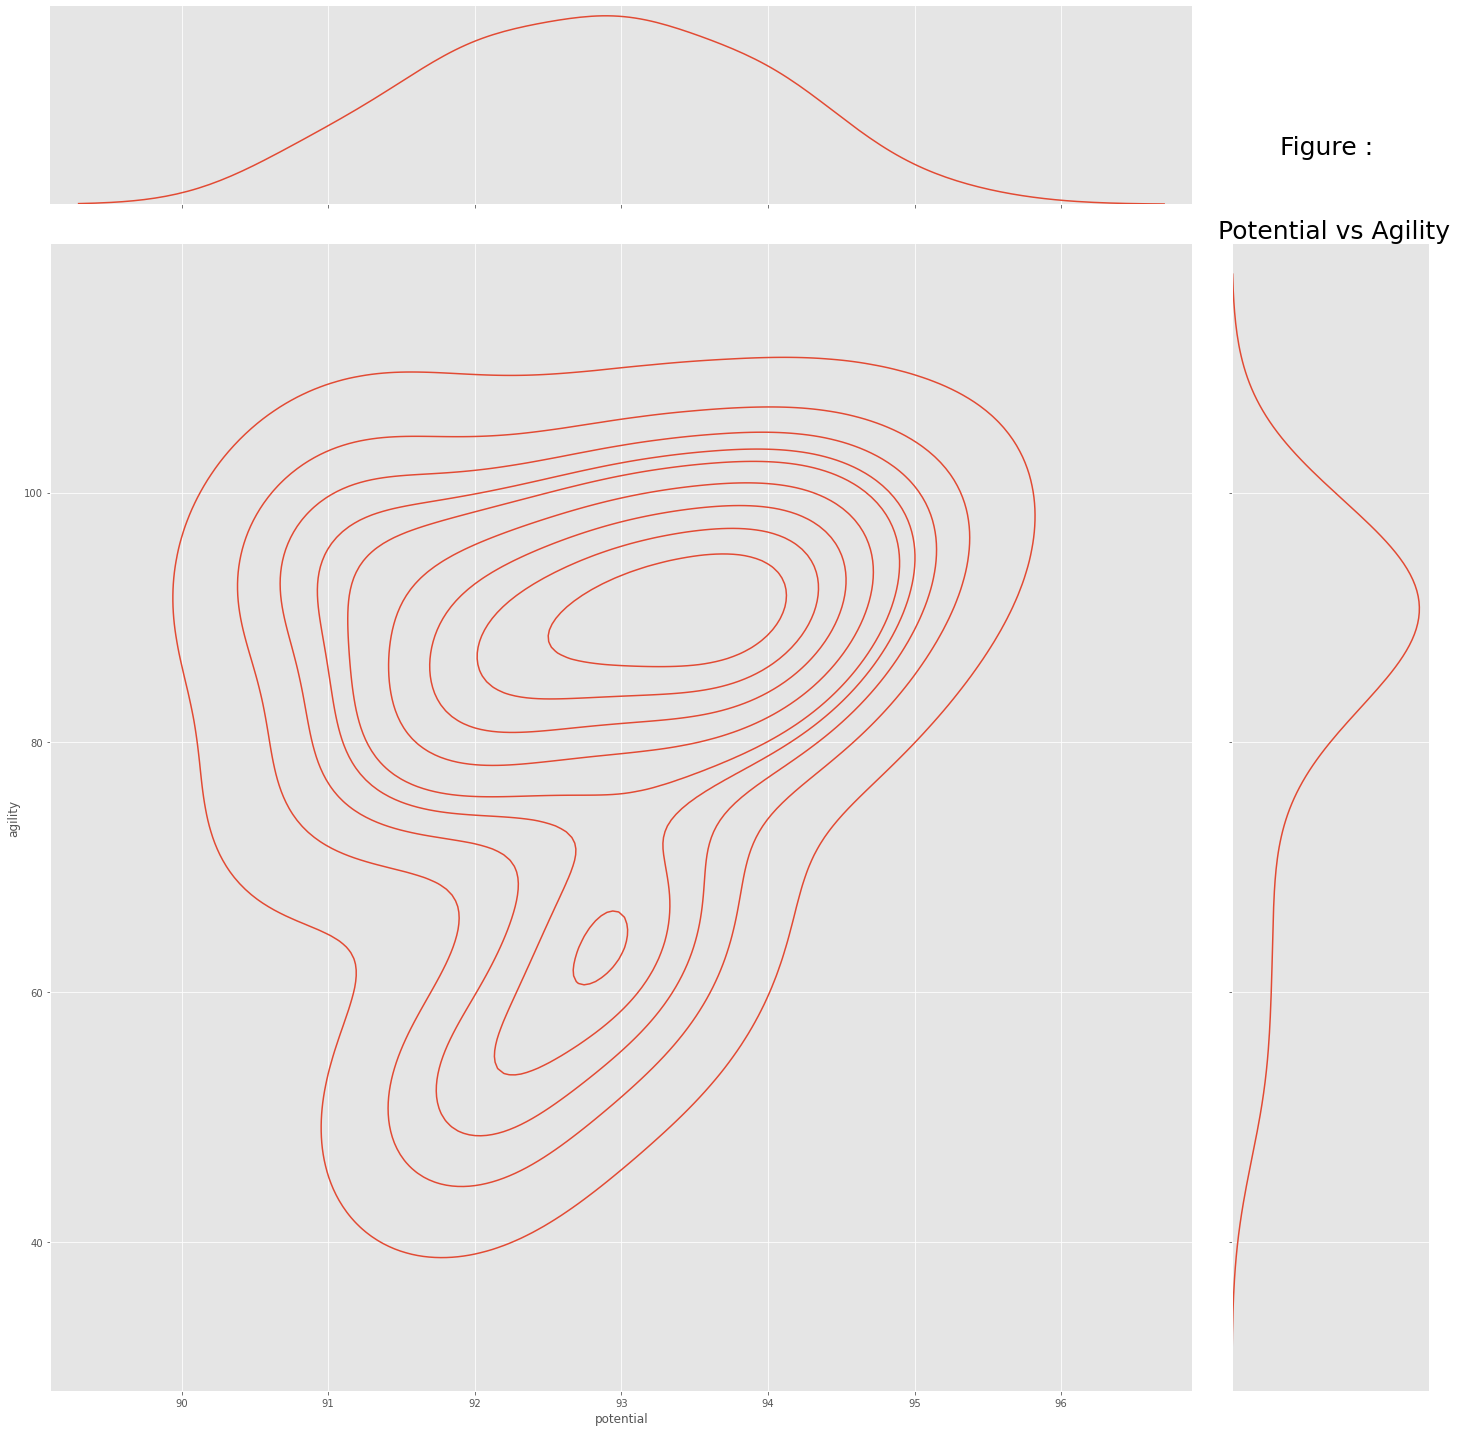

In [66]:
sns.jointplot(x="potential", y="agility",data=fifa_df,
            
            kind="kde",height=20,palette="cool");
plt.title("Figure : \n\n\n Potential vs Agility", fontsize=25);

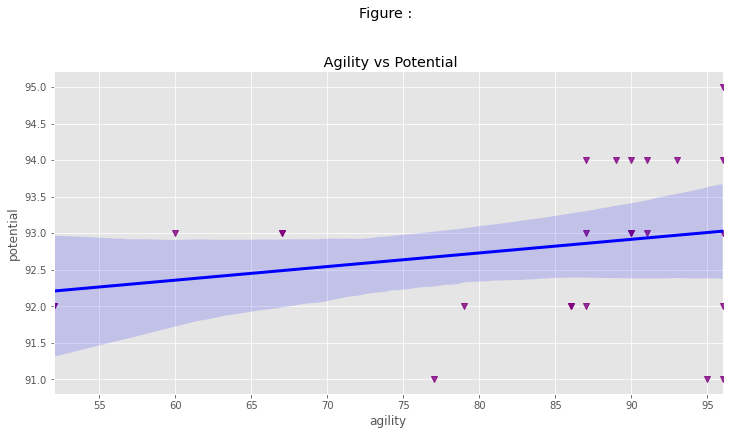

In [67]:
sns.lmplot(x="agility", y="potential",data=fifa_df,markers="v",
            scatter_kws={"color": "purple"},
         line_kws={"linewidth":3,"color":"blue"},aspect=2);
plt.title("Figure : \n\n\n Agility vs Potential");

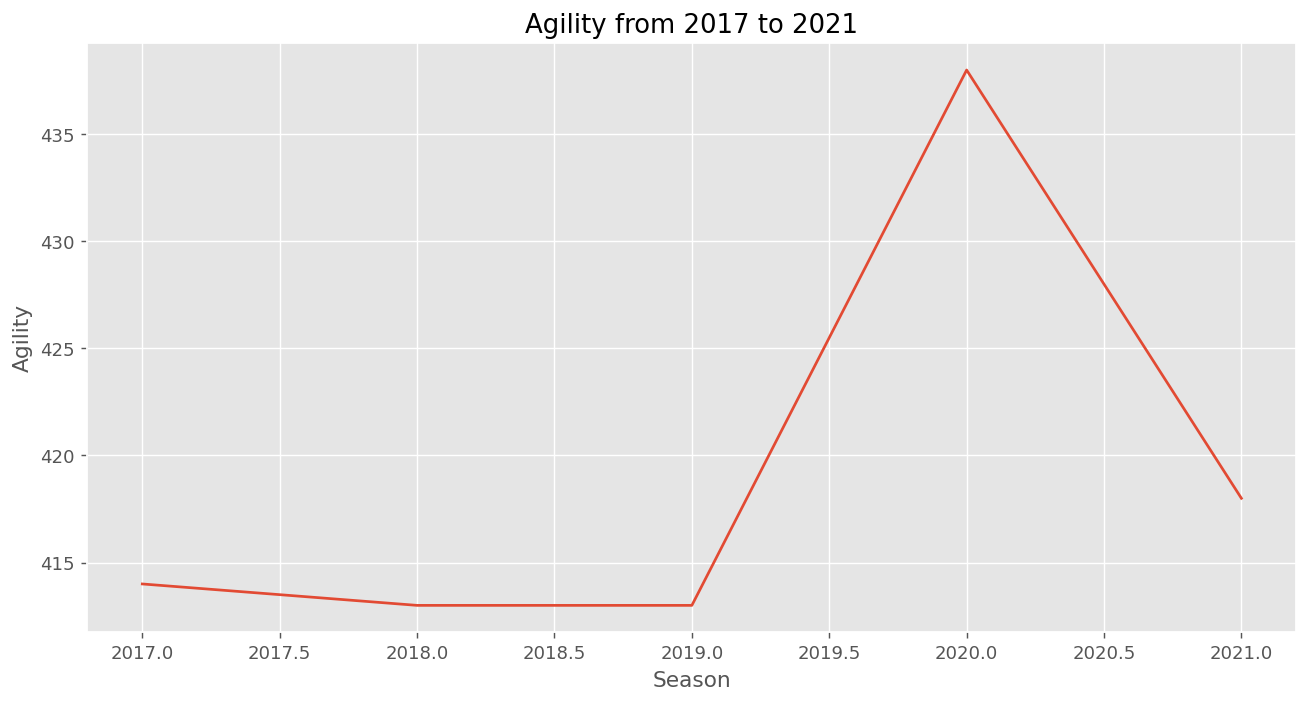

In [68]:
agility_season = fifa_df.groupby('season')['agility'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Season', fontsize = 12)
#on y-axis
plt.ylabel('Agility', fontsize = 12)
#title of the line plot
plt.title('Agility from 2017 to 2021')

#plotting the graph
plt.plot(agility_season)

#displaying the line plot
plt.show()

### Findings Agility and Potential Ranking and Wage.


- Agility lies between 50 to 95.
- Agility of a Player does affect their Wage.
- As agility increases the potential ranking increases.
- There was an increase in agility in 2020.
- The decrease in agility from 2020 to 2021 could be due to COVID and the lack of training.
- Agility in 2017 compared 2021 is rougly the same.

## Does BMI affect Potential Ranking and Wage ?

In [69]:
fifa_df.BMI.value_counts()

242    6
243    4
270    3
275    2
265    2
285    2
264    1
267    1
268    1
269    1
249    1
251    1
Name: BMI, dtype: int64

In [70]:
fifa_df.BMI.isnull().any()

False

In [71]:
fifa_df.BMI.unique()

array([265, 242, 285, 267, 243, 268, 270, 269, 251, 275, 249, 264])

In [72]:
avgwageoverall = fifa_df.groupby("BMI", as_index=False)["wage","potential"].mean()
avgwageoverall.sort_values(by="wage",inplace=True,ascending=False)
avgwageoverall.head()

,BMI,wage,potential
5,265,575000.000000,94.000000
0,242,551666.666667,93.666667
6,267,525000.000000,92.000000
7,268,500000.000000,92.000000
2,249,475000.000000,91.000000


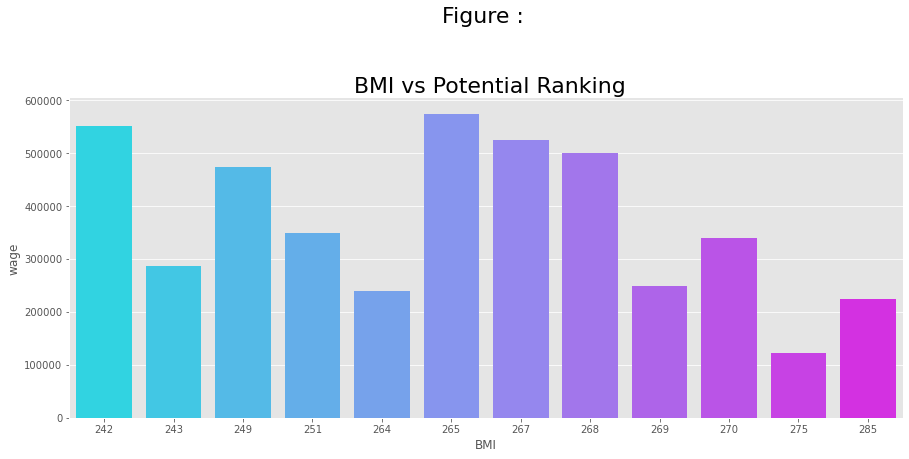

In [73]:
sns.catplot(x="BMI", y="wage",data=avgwageoverall,
            kind="bar",aspect=2.5,palette="cool");
plt.title("Figure : \n\n\n BMI vs Potential Ranking",fontsize=22);

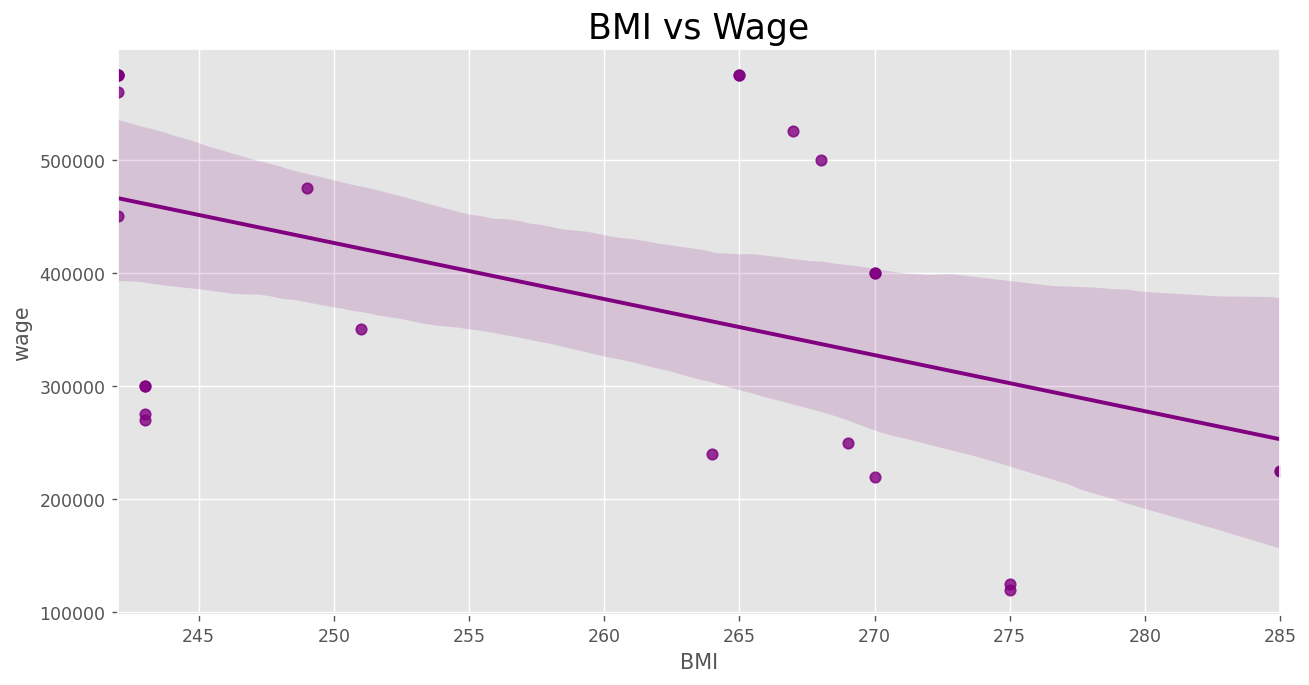

In [74]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa_df['BMI']
y=fifa_df['wage']

sns.regplot(x,y,color='purple')
plt.title('BMI vs Wage',fontsize = 20)
plt.xlabel('BMI')
plt.ylabel('wage')
plt.show()

### Findings BMI and Potential Ranking and Wage.

- There are 12 unique BMI of players.
- Minimum BMI of player is 242.
- Maximum BMI of players height is 285.

- BMI of a player does not have effect on wage but trends betwen 265 and 268.
- As BMI increases the wage decreases.

### Overall Findings :


- Preffered foot has not much effect on either wage or potential ranking.
- The top nationalities are Brazil,argentina and Portugal.
- Nationality does affect wage and potential ranking of a player.
- Age of a player does not affect much on their wage nor potential.
- Between the ages of 26 to 31 players tend to have a high potential however their is an decrease between the ages of 28 to 29.
- Acceleration of a Player does affect their Wage.
- As Acceleration increase the wage increases.
- As Acceleration increase the potential ranking increases.
- There is a decrease in acceleration of the players over the season.
- Agility of a Player does affect their Wage.
- As agility increases the potential ranking increases.
- There was an increase in agility in 2020.
- The decrease in agility from 2020 to 2021 could be due to COVID and the lack of training.
- Agility in 2017 compared 2021 is rougly the same.
- BMI of a player does not have effect on wage but trends betwen 265 and 268.
- As BMI increases the wage decreases.

My prediction "The top 5% players of FIFA 21 are faster (higher Acceleration and Agility) compared to FIFA 17." was proven correct. This can be seen be the graphs above. 

I would further extend my analysis to get more findings by individually analysising each player statistic and difference through the seasons. I would also further research more into current news affairs when making a prediction.

# References

- https://sofifa.com
- https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset